# Term Deposit Marketing

## Building a Robust Solution for Term Deposit Subscription Prediction

As a growing participant in the European banking sector, effectively addressing challenges such as fraud detection, sentiment analysis, and customer behavior insights is essential to achieving success. Even modest datasets represent valuable resources that can drive solutions to these challenges while enhancing customer satisfaction.

We have collected a dataset derived from customer interactions, focusing specifically on calls aimed at promoting our service subscription: term deposits. This dataset includes features related to both customers and call details. To maintain strict adherence to customer privacy regulations, all personal identifying information has been removed.

### Objectives

To ensure a robust and effective solution, we adopt a three-layer approach:

#### 1. Exploratory Analysis
We begin with an in-depth exploratory analysis to:
- Understand the dataset's structure.
- Examine its shape and key characteristics.
- Summarize key outputs to identify patterns, detect potential issues, and gain initial insights for informed decision-making.

#### 2. High-Accuracy Filtering Model
The first layer focuses on building a high-accuracy machine learning model to:
- Filter out cases with a high likelihood of failure.
- Minimize unsuccessful calls, improving efficiency and resource allocation.

#### 3. High-Precision Persuasion Model
The second layer employs a high-precision model designed to:
- Predict whether a customer is likely to be persuaded to subscribe to the term deposit.
- Target customers who pass the first stage for focused and effective follow-ups.

#### 4. Clustering-Based Success Analysis
The final layer applies a clustering approach to:
- Divide the dataset features into five distinct clusters.
- Provide insights into the probability of success within each cluster.
- Enable better strategic decisions and personalized engagement strategies.

### Conclusion

By integrating these layers, we aim to maximize the success rate of term deposit subscriptions. This approach leverages machine learning and clustering techniques to deliver targeted, efficient, and data-driven solutions that align with business objectives.


## Exploratory Data Analysis

In the first step, we analyze the collected call data. This analysis provides insights into both the quantity and quality of the input data for each feature. Additionally, it examines the ratio of successful sales to the total number of calls, offering valuable information about the overall success rate.

In [2]:
import pandas as pd
import logging
logging.getLogger().disabled = True
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
term_deposit_marketing_2020=pd.read_csv("term-deposit-marketing-2020.csv")

### The dataset schema

In [6]:
term_deposit_marketing_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [7]:
term_deposit_marketing_2020.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


The dataset comprises 13 input features along with an output variable that indicates the outcome of a marketing call. The output variable (y) specifies whether the customer agreed to the term deposit subscription. The input features encompass various aspects of customer information, including demographic details such as age, job, marital status, and education level. Additionally, the dataset reflects the customers' financial status through features like account balance, loan status, and housing information. It also includes details about the customers' interaction with the campaign, such as the number of contacts made, the duration of the last call (in seconds), and the date of the most recent contact.

## Data Analysis

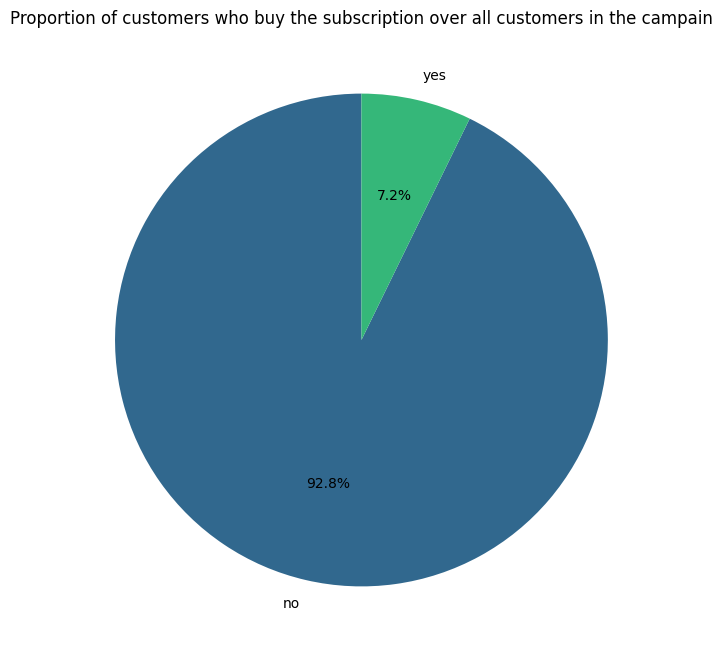

In [8]:
# Calculate the value counts
counts = term_deposit_marketing_2020["y"].value_counts()

# Prepare the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts.values, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("viridis", len(counts))
)

# Title
plt.title(f'Proportion of customers who buy the subscription over all customers in the campain')
plt.show()


In [9]:
term_deposit_marketing_2020.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


# Dataset Description

This dataset contains **40,000 records** and 14 features (columns) related to customer data and their banking activity. Below is a detailed description of each feature, including its range, unique values, and key statistics:

---

## 1. Age
- **Type**: Numerical
- **Range**: 19 to 95 years
- **Statistics**:
  - Mean: 40.54
  - Standard Deviation: 9.64
  - Median: 39
  - Interquartile Range (IQR): 33 to 48
- **Description**: Represents the age of the customer. Most customers fall within the range of 33 to 48 years.

---

## 2. Job
- **Type**: Categorical
- **Unique Values**: 12
- **Most Common Value**: `blue-collar` (9,383 occurrences)
- **Description**: Indicates the job type of the customer (e.g., `blue-collar`, `management`, `technician`, etc.).

---

## 3. Marital
- **Type**: Categorical
- **Unique Values**: 3 (`married`, `single`, `divorced`)
- **Most Common Value**: `married` (24,386 occurrences)
- **Description**: Specifies the marital status of the customer.

---

## 4. Education
- **Type**: Categorical
- **Unique Values**: 4 (`primary`, `secondary`, `tertiary`, `unknown`)
- **Most Common Value**: `secondary` (20,993 occurrences)
- **Description**: Represents the education level of the customer.

---

## 5. Default
- **Type**: Categorical
- **Unique Values**: 2 (`yes`, `no`)
- **Most Common Value**: `no` (39,191 occurrences)
- **Description**: Indicates whether the customer has credit in default.

---

## 6. Balance
- **Type**: Numerical
- **Range**: -8,019 to 102,127
- **Statistics**:
  - Mean: 1,274.28
  - Standard Deviation: 2,903.77
  - Median: 407
  - Interquartile Range (IQR): 54 to 1,319
- **Description**: Represents the account balance of the customer in euros. The data includes negative balances, with a wide range of values.

---

## 7. Housing
- **Type**: Categorical
- **Unique Values**: 2 (`yes`, `no`)
- **Most Common Value**: `yes` (24,031 occurrences)
- **Description**: Indicates whether the customer has a housing loan.

---

## 8. Loan
- **Type**: Categorical
- **Unique Values**: 2 (`yes`, `no`)
- **Most Common Value**: `no` (33,070 occurrences)
- **Description**: Indicates whether the customer has a personal loan.

---

## 9. Contact
- **Type**: Categorical
- **Unique Values**: 3 (`unknown`, `cellular`, `telephone`)
- **Most Common Value**: `cellular` (24,914 occurrences)
- **Description**: Specifies the contact communication type with the customer.

---

## 10. Day
- **Type**: Numerical
- **Range**: 1 to 31
- **Statistics**:
  - Mean: 16.02
  - Standard Deviation: 8.28
  - Median: 17
- **Description**: Represents the day of the month the customer was last contacted.

---

## 11. Month
- **Type**: Categorical
- **Unique Values**: 11 (`jan` to `dec`)
- **Most Common Value**: `may` (13,532 occurrences)
- **Description**: Indicates the month the customer was last contacted.

---

## 12. Duration
- **Type**: Numerical
- **Range**: 0 to 4,918 seconds
- **Statistics**:
  - Mean: 254.82 seconds
  - Standard Deviation: 259.37 seconds
  - Median: 175 seconds
- **Description**: Represents the duration of the last call with the customer, in seconds. Note that this feature is strongly correlated with the outcome (`y`).

---

## 13. Campaign
- **Type**: Numerical
- **Range**: 1 to 63
- **Statistics**:
  - Mean: 2.88
  - Standard Deviation: 3.24
  - Median: 2
- **Description**: Represents the number of contacts performed during this campaign for the customer.

---

## 14. y (Target)
- **Type**: Categorical
- **Unique Values**: 2 (`yes`, `no`)
- **Most Common Value**: `no` (37,104 occurrences)
- **Description**: Indicates whether the customer has subscribed to a term deposit (`yes` or `no`).

---

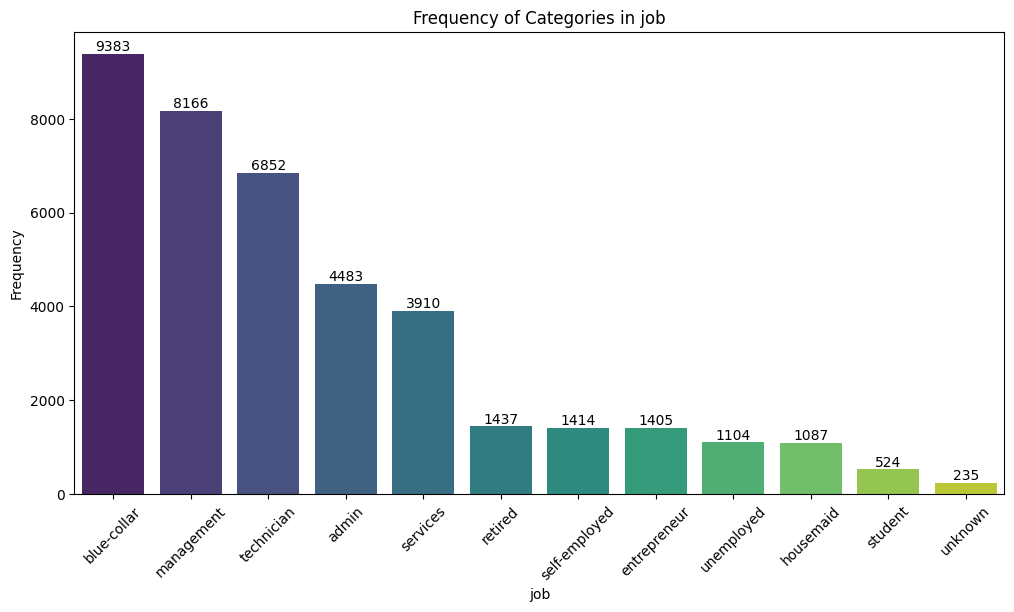

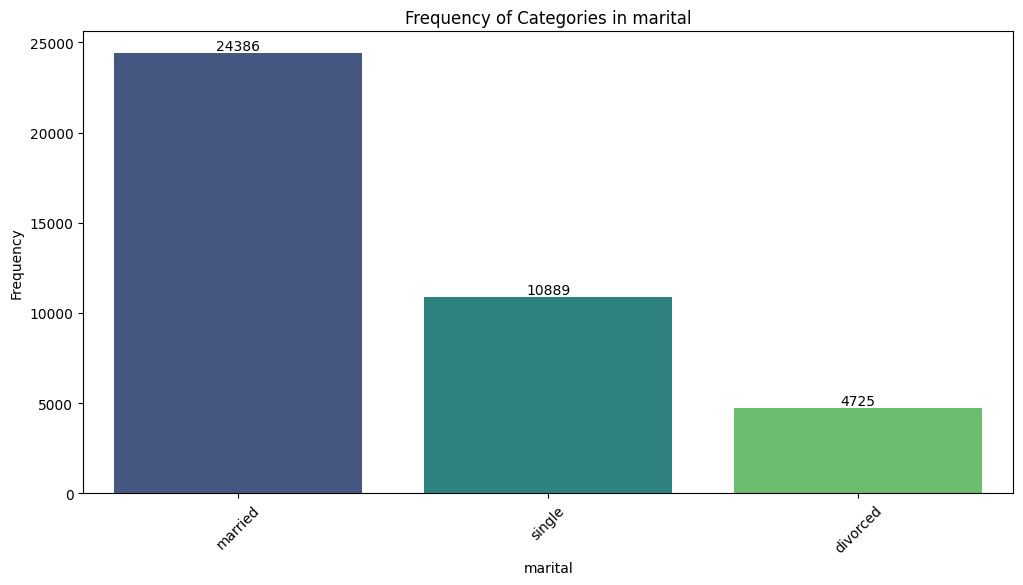

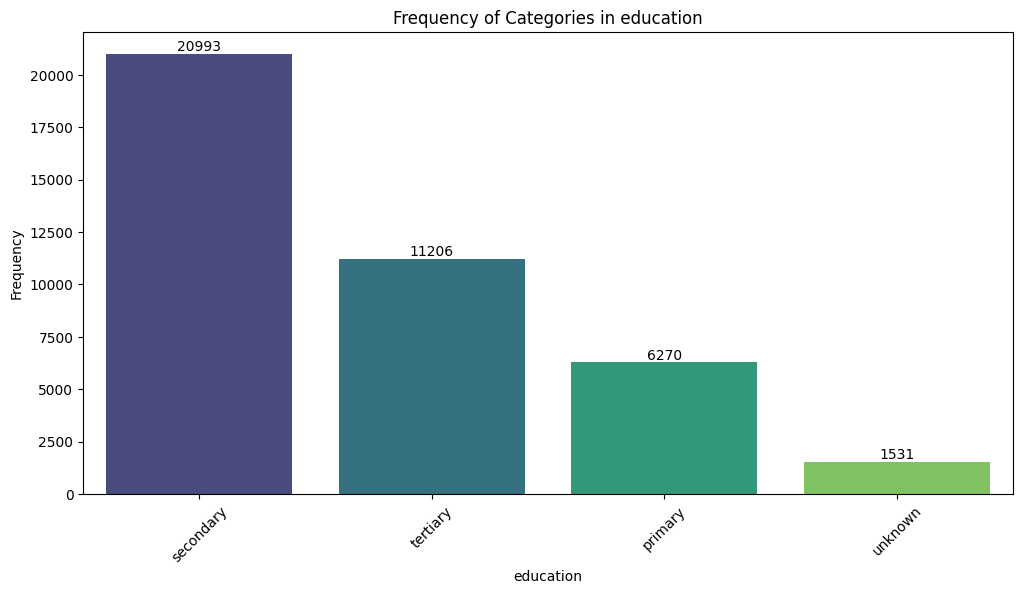

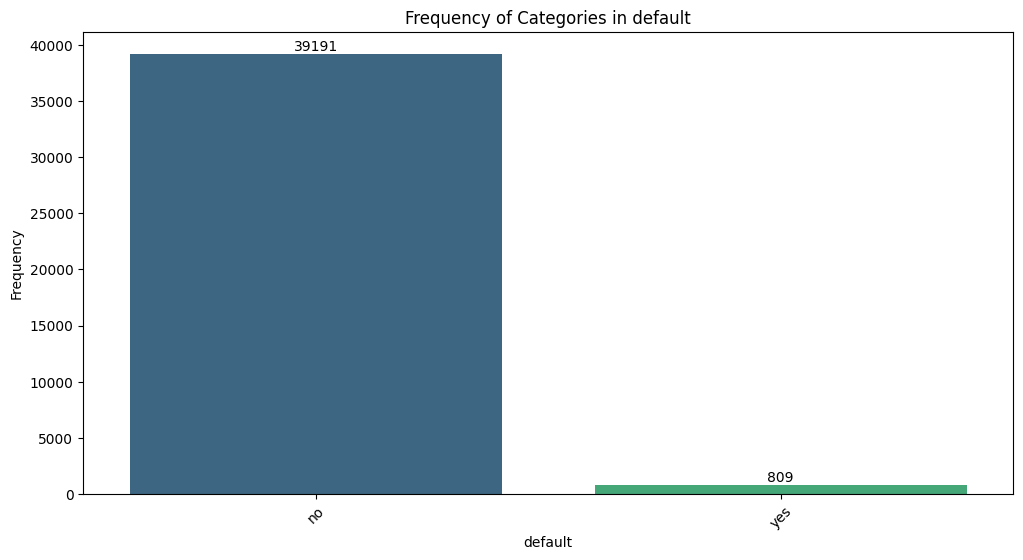

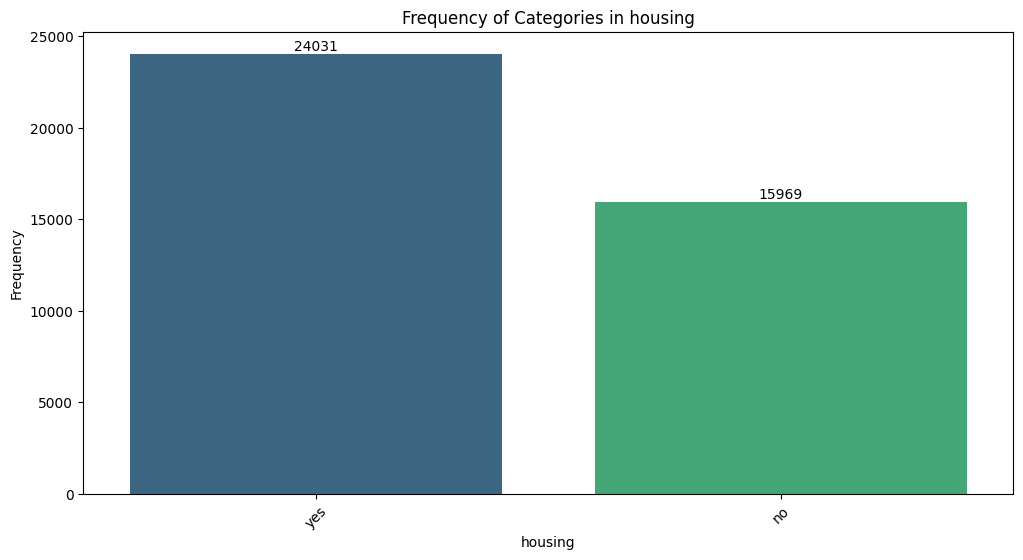

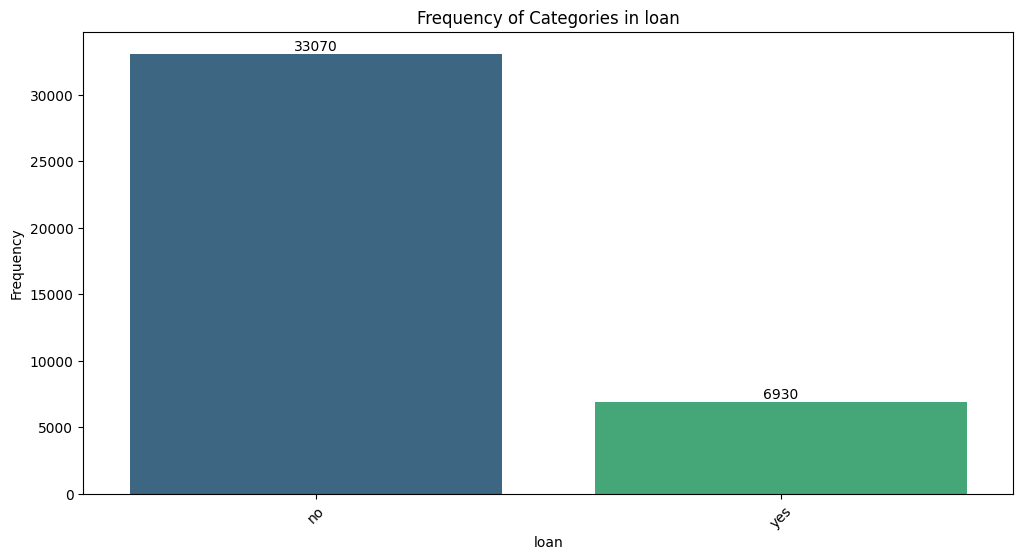

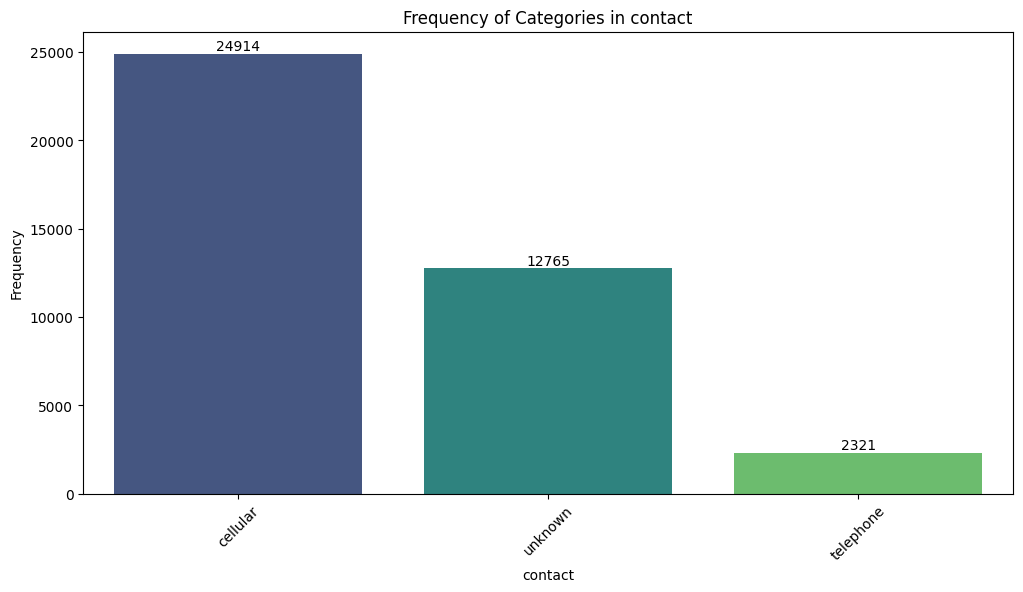

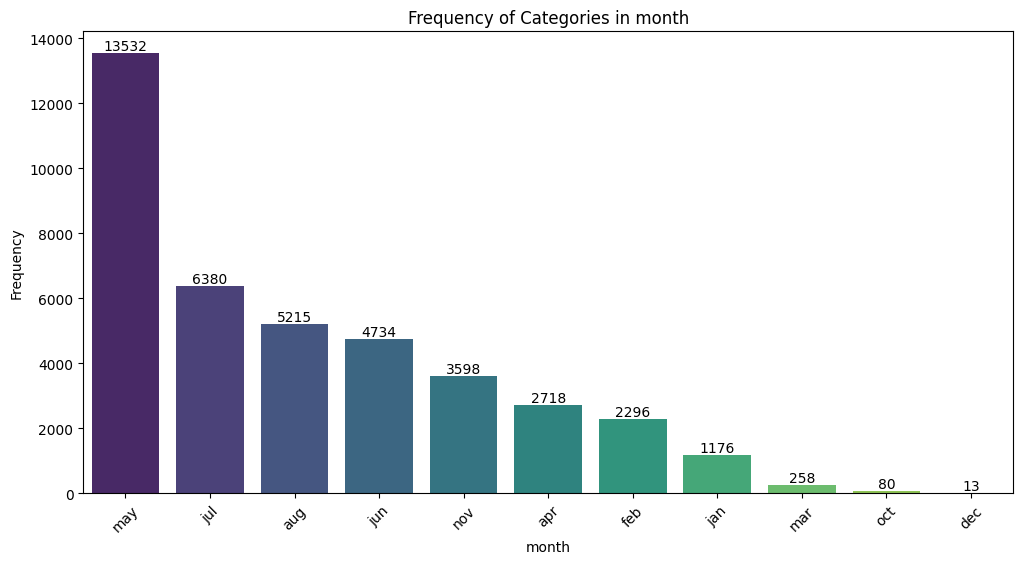

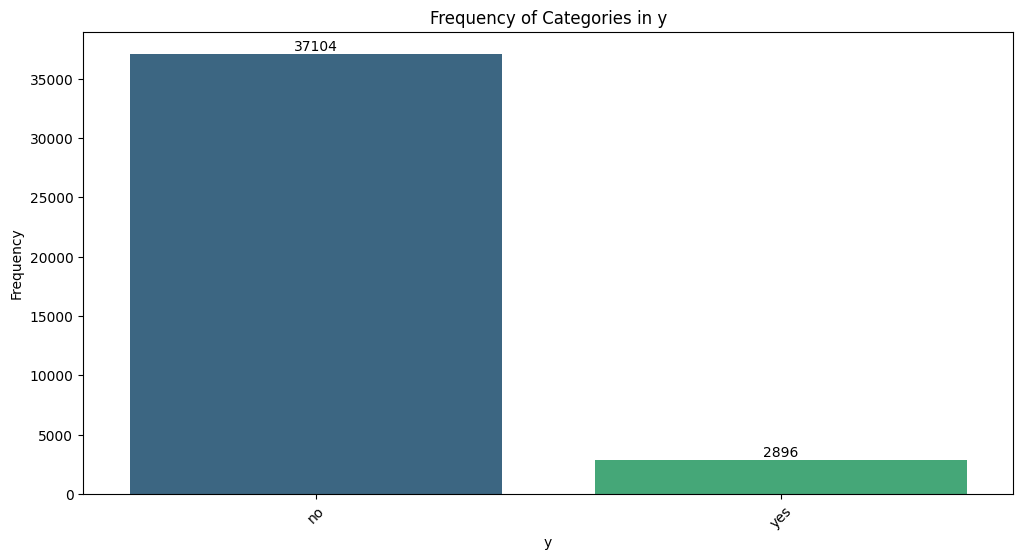

In [10]:
categorical_cols = term_deposit_marketing_2020.select_dtypes(include=['object', 'category']).columns
for cat_col in categorical_cols:
    # Calculate frequencies for each category
    counts = term_deposit_marketing_2020[cat_col].value_counts()
    
    # Prepare the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    
    # Annotate bar with the count values
    for i, count in enumerate(counts.values):
        plt.text(i, count, str(count), ha='center', va='bottom')
    
    # Title and labels
    plt.title(f'Frequency of Categories in {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

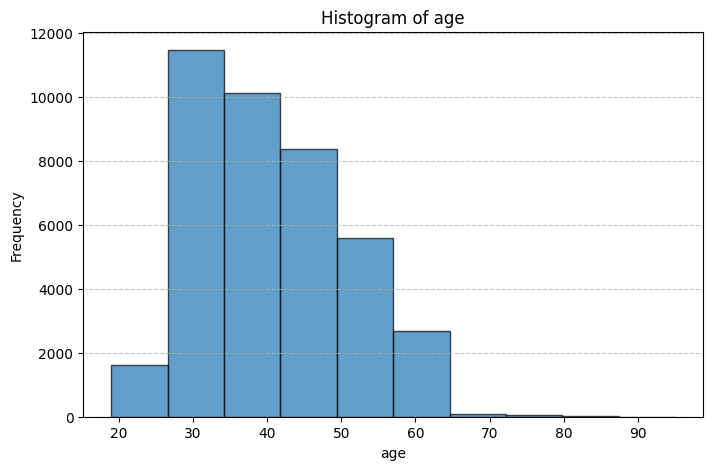

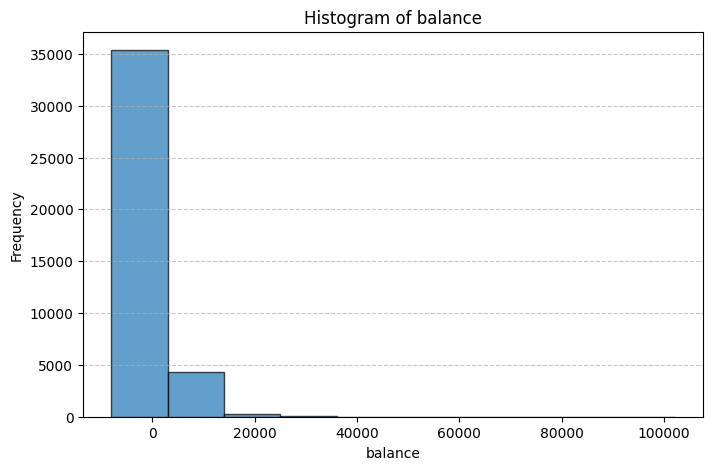

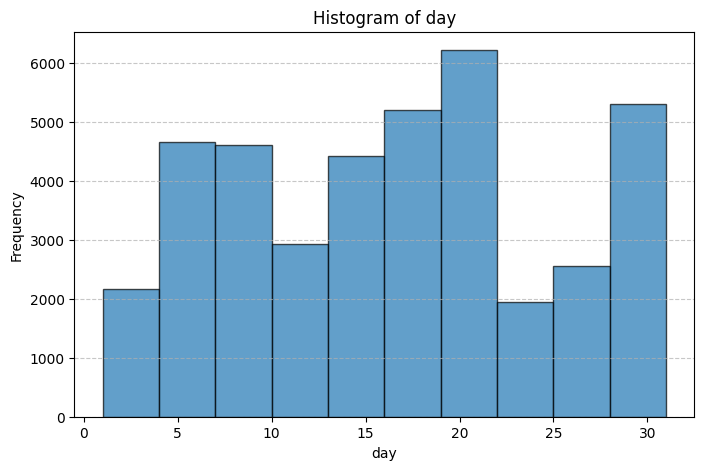

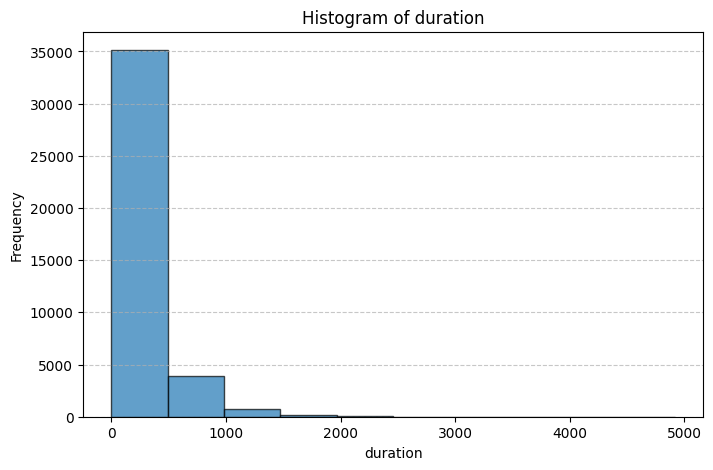

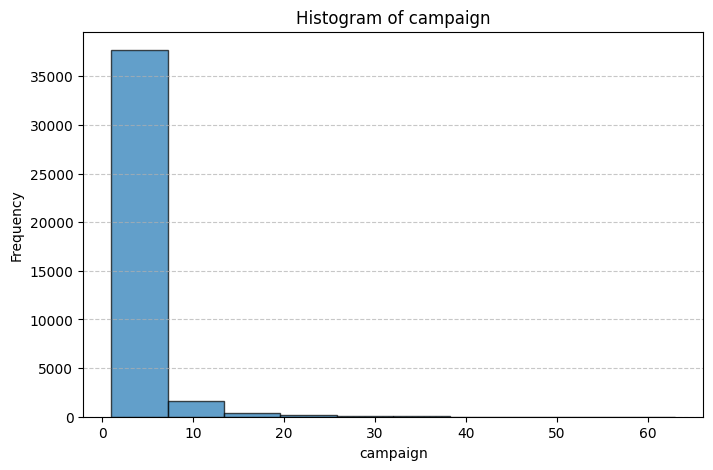

In [11]:
continuous_cols = term_deposit_marketing_2020.select_dtypes(include=['float', 'int']).columns
for col in continuous_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(term_deposit_marketing_2020[col], edgecolor='k', alpha=0.7)  # Adjust bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

The analysis shows that approximately 93% of customers decline to join the campaign.

In [13]:
average_values = term_deposit_marketing_2020[['campaign', 'duration']].mean()

# Display the results
print(average_values)

campaign      2.882175
duration    254.824300
dtype: float64


## Solution

Through this investigation, we propose a multi-faceted solution based on data-driven models to optimize campaign efficiency and effectiveness:

## 1. Develop a Machine Learning Model for Success Prediction
Design a predictive model to estimate the likelihood of success for each customer. This model can be used to prune customers with a lower probability of conversion, reducing wasted resources and improving campaign focus.

## 2. Refined Model for Future Engagement
Build a specialized predictive model to identify customers who are more likely to accept the campaign in future calls. This approach ensures that such customers remain part of the campaign, even if they decline during the current interaction.

## 3. Customer Clustering and Success Analysis
Implement a clustering algorithm to group customers based on their features. Compute the success probability for each cluster, leveraging shared characteristics within clusters to develop targeted strategies for improved campaign outcomes.


In [14]:
from pycaret.classification import *
import os
os.environ["PYTHONWARNINGS"] = "ignore"
warnings.filterwarnings("ignore")
logging.getLogger("LightGBM").setLevel(logging.ERROR)

After running 1000 different random seeds we found the following list of random seeds are most fair values and can provide the average results in running

In [15]:
random_states=[392, 406, 393, 221, 845, 638, 226, 958, 660, 491]

In [16]:
from pycaret.classification import *
import pandas as pd
import numpy as np

# Placeholder to store DataFrames
dataframes = []

# Loop over 10 random seeds
for seed in random_states:  # 0 to 9
    print(f"Running PyCaret setup with seed: {seed}")
    clf_setup = setup(
        verbose=False,
        data=term_deposit_marketing_2020,
        target='y',  # The target column
        categorical_features=['job', 'marital', 'education', 'default', 'housing', 'loan'],
        numeric_features=['age', 'balance'],
        session_id=seed,  # Random seed changes here
        feature_selection=True,
        use_gpu=True
    )
    
    # Get the best model for this seed
    best_model = compare_models()
    
    # Evaluate the best model on holdout set
    model_results = pull()
    
    # Append the DataFrame for this seed
    dataframes.append(model_results)

Running PyCaret setup with seed: 392
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9315,0.8748,0.9315,0.9170,0.9200,0.3277,0.3536,1.4170
lr,Logistic Regression,0.9314,0.8685,0.9314,0.9141,0.9155,0.2674,0.3105,0.4560
nb,Naive Bayes,0.9311,0.8613,0.9311,0.9215,0.9249,0.3977,0.4065,0.4330
qda,Quadratic Discriminant Analysis,0.9311,0.8622,0.9311,0.9215,0.9250,0.3982,0.4069,0.4490
lda,Linear Discriminant Analysis,0.9310,0.8682,0.9310,0.9217,0.9250,0.4004,0.4086,0.3920
ada,Ada Boost Classifier,0.9306,0.8706,0.9306,0.9162,0.9195,0.3258,0.3499,0.9480
ridge,Ridge Classifier,0.9297,0.8682,0.9297,0.9088,0.9059,0.1527,0.2210,0.4620
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3830
knn,K Neighbors Classifier,0.9248,0.7640,0.9248,0.9087,0.9139,0.2848,0.3019,0.6480
rf,Random Forest Classifier,0.9216,0.8134,0.9216,0.9088,0.9135,0.2997,0.3101,0.8150


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 406
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9330,0.8676,0.9330,0.9171,0.9175,0.2849,0.3301,0.4760
gbc,Gradient Boosting Classifier,0.9325,0.8741,0.9325,0.9173,0.9194,0.3127,0.3466,1.6110
ada,Ada Boost Classifier,0.9311,0.8703,0.9311,0.9158,0.9188,0.3126,0.3415,0.9510
ridge,Ridge Classifier,0.9308,0.8671,0.9308,0.9125,0.9078,0.1714,0.2442,0.4470
nb,Naive Bayes,0.9307,0.8621,0.9307,0.9211,0.9246,0.3957,0.4040,0.3910
qda,Quadratic Discriminant Analysis,0.9306,0.8621,0.9306,0.9210,0.9245,0.3949,0.4031,0.4620
lda,Linear Discriminant Analysis,0.9305,0.8671,0.9305,0.9211,0.9246,0.3972,0.4048,0.4270
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3840
knn,K Neighbors Classifier,0.9254,0.7708,0.9254,0.9097,0.9149,0.2950,0.3108,0.5180
rf,Random Forest Classifier,0.9219,0.8197,0.9219,0.9059,0.9118,0.2737,0.2863,0.7980


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 393
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9319,0.8655,0.9319,0.9153,0.9165,0.2779,0.3203,0.4210
gbc,Gradient Boosting Classifier,0.9313,0.8763,0.9313,0.9156,0.9184,0.3068,0.3376,1.4040
ada,Ada Boost Classifier,0.9312,0.8721,0.9312,0.9157,0.9188,0.3131,0.3413,0.9220
ridge,Ridge Classifier,0.9301,0.8654,0.9301,0.9099,0.9073,0.1686,0.2352,0.4450
lda,Linear Discriminant Analysis,0.9295,0.8654,0.9295,0.9210,0.9243,0.4000,0.4059,0.3850
nb,Naive Bayes,0.9292,0.8605,0.9292,0.9204,0.9239,0.3951,0.4012,0.4120
qda,Quadratic Discriminant Analysis,0.9292,0.8605,0.9292,0.9205,0.9239,0.3959,0.4019,0.4430
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3970
knn,K Neighbors Classifier,0.9245,0.7694,0.9245,0.9081,0.9136,0.2819,0.2983,0.5210
rf,Random Forest Classifier,0.9189,0.8128,0.9189,0.9055,0.9107,0.2785,0.2873,0.7770


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 221
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9323,0.8700,0.9323,0.9173,0.9197,0.3177,0.3493,1.5000
lr,Logistic Regression,0.9321,0.8635,0.9321,0.9155,0.9163,0.2748,0.3192,0.4060
ada,Ada Boost Classifier,0.9309,0.8674,0.9309,0.9171,0.9206,0.3398,0.3607,0.9390
ridge,Ridge Classifier,0.9299,0.8631,0.9299,0.9088,0.9065,0.1591,0.2257,0.4290
lda,Linear Discriminant Analysis,0.9297,0.8631,0.9297,0.9205,0.9239,0.3931,0.4003,0.3910
nb,Naive Bayes,0.9294,0.8574,0.9294,0.9201,0.9236,0.3901,0.3974,0.3890
qda,Quadratic Discriminant Analysis,0.9293,0.8578,0.9293,0.9200,0.9236,0.3901,0.3973,0.4400
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3820
knn,K Neighbors Classifier,0.9244,0.7610,0.9244,0.9082,0.9137,0.2845,0.3001,0.5240
rf,Random Forest Classifier,0.9228,0.8093,0.9228,0.9087,0.9139,0.2972,0.3086,0.7670


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 845
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9322,0.8658,0.9322,0.9158,0.9165,0.2756,0.3204,0.3930
gbc,Gradient Boosting Classifier,0.9310,0.8729,0.9310,0.9149,0.9179,0.3015,0.3322,1.5290
ridge,Ridge Classifier,0.9301,0.8654,0.9301,0.9104,0.9065,0.1585,0.2292,0.4300
lda,Linear Discriminant Analysis,0.9298,0.8654,0.9298,0.9203,0.9238,0.3915,0.3990,0.4250
qda,Quadratic Discriminant Analysis,0.9297,0.8606,0.9297,0.9201,0.9236,0.3890,0.3968,0.4400
ada,Ada Boost Classifier,0.9296,0.8689,0.9296,0.9130,0.9165,0.2914,0.3202,0.9480
nb,Naive Bayes,0.9295,0.8596,0.9295,0.9199,0.9235,0.3880,0.3958,0.3830
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3910
knn,K Neighbors Classifier,0.9255,0.7567,0.9255,0.9097,0.9148,0.2926,0.3094,0.5100
rf,Random Forest Classifier,0.9212,0.8099,0.9212,0.9076,0.9126,0.2902,0.3008,0.7860


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 638
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9332,0.8683,0.9332,0.9178,0.9182,0.2929,0.3370,0.3940
gbc,Gradient Boosting Classifier,0.9324,0.8752,0.9324,0.9177,0.9202,0.3247,0.3545,1.4410
ridge,Ridge Classifier,0.9310,0.8680,0.9310,0.9129,0.9080,0.1733,0.2463,0.4430
lda,Linear Discriminant Analysis,0.9309,0.8680,0.9309,0.9218,0.9252,0.4029,0.4104,0.3840
ada,Ada Boost Classifier,0.9308,0.8713,0.9308,0.9169,0.9202,0.3348,0.3571,0.9380
nb,Naive Bayes,0.9290,0.8615,0.9290,0.9202,0.9236,0.3924,0.3989,0.3910
qda,Quadratic Discriminant Analysis,0.9289,0.8616,0.9289,0.9200,0.9234,0.3915,0.3980,0.4420
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3810
knn,K Neighbors Classifier,0.9248,0.7627,0.9248,0.9083,0.9138,0.2833,0.2998,0.5180
rf,Random Forest Classifier,0.9207,0.8117,0.9207,0.9074,0.9125,0.2912,0.3006,0.7710


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 226
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9335,0.8718,0.9335,0.9185,0.9190,0.3022,0.3445,0.3900
gbc,Gradient Boosting Classifier,0.9323,0.8823,0.9323,0.9184,0.9214,0.3416,0.3662,1.3470
qda,Quadratic Discriminant Analysis,0.9319,0.8650,0.9319,0.9237,0.9268,0.4191,0.4255,0.4360
nb,Naive Bayes,0.9318,0.8646,0.9318,0.9236,0.9266,0.4177,0.4243,0.4100
lda,Linear Discriminant Analysis,0.9318,0.8717,0.9318,0.9237,0.9268,0.4199,0.4260,0.4030
ada,Ada Boost Classifier,0.9310,0.8803,0.9310,0.9169,0.9202,0.3329,0.3563,0.9110
ridge,Ridge Classifier,0.9307,0.8717,0.9307,0.9118,0.9086,0.1822,0.2497,0.4070
knn,K Neighbors Classifier,0.9280,0.7716,0.9280,0.9136,0.9179,0.3203,0.3379,0.5240
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3870
rf,Random Forest Classifier,0.9188,0.8138,0.9188,0.9080,0.9124,0.3025,0.3086,0.7650


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 958
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9327,0.8675,0.9327,0.9167,0.9176,0.2881,0.3308,0.4090
gbc,Gradient Boosting Classifier,0.9320,0.8775,0.9320,0.9172,0.9202,0.3269,0.3541,1.3600
ada,Ada Boost Classifier,0.9319,0.8727,0.9319,0.9180,0.9213,0.3428,0.3655,0.9510
nb,Naive Bayes,0.9305,0.8622,0.9305,0.9213,0.9247,0.3990,0.4066,0.3910
ridge,Ridge Classifier,0.9304,0.8670,0.9304,0.9109,0.9074,0.1680,0.2374,0.4390
qda,Quadratic Discriminant Analysis,0.9304,0.8626,0.9304,0.9213,0.9247,0.3993,0.4067,0.4460
lda,Linear Discriminant Analysis,0.9301,0.8670,0.9301,0.9213,0.9246,0.4002,0.4070,0.3850
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3810
knn,K Neighbors Classifier,0.9261,0.7702,0.9261,0.9103,0.9153,0.2958,0.3135,0.5340
rf,Random Forest Classifier,0.9206,0.8141,0.9206,0.9085,0.9130,0.2998,0.3090,0.7480


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 660
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9328,0.8713,0.9328,0.9170,0.9175,0.2860,0.3305,0.3930
ada,Ada Boost Classifier,0.9328,0.8758,0.9328,0.9188,0.9214,0.3391,0.3661,0.9350
gbc,Gradient Boosting Classifier,0.9327,0.8794,0.9327,0.9180,0.9202,0.3221,0.3541,1.4550
nb,Naive Bayes,0.9312,0.8641,0.9312,0.9220,0.9253,0.4019,0.4105,0.3840
qda,Quadratic Discriminant Analysis,0.9310,0.8650,0.9310,0.9218,0.9250,0.3999,0.4086,0.4520
lda,Linear Discriminant Analysis,0.9310,0.8710,0.9310,0.9220,0.9252,0.4030,0.4110,0.3990
ridge,Ridge Classifier,0.9305,0.8710,0.9305,0.9117,0.9076,0.1701,0.2408,0.4340
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3900
knn,K Neighbors Classifier,0.9265,0.7671,0.9265,0.9110,0.9158,0.3002,0.3183,0.5230
rf,Random Forest Classifier,0.9216,0.8133,0.9216,0.9077,0.9129,0.2914,0.3020,0.7550


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 491
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9326,0.8687,0.9326,0.9166,0.9174,0.2858,0.3292,0.4160
gbc,Gradient Boosting Classifier,0.9322,0.8805,0.9322,0.9171,0.9190,0.3094,0.3438,1.2800
ada,Ada Boost Classifier,0.9307,0.8777,0.9307,0.9161,0.9194,0.3238,0.3484,0.9250
ridge,Ridge Classifier,0.9306,0.8686,0.9306,0.9116,0.9077,0.1717,0.2419,0.4450
lda,Linear Discriminant Analysis,0.9304,0.8686,0.9304,0.9216,0.9249,0.4018,0.4089,0.3980
qda,Quadratic Discriminant Analysis,0.9301,0.8637,0.9301,0.9210,0.9244,0.3964,0.4039,0.4470
nb,Naive Bayes,0.9299,0.8638,0.9299,0.9207,0.9241,0.3937,0.4014,0.3880
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.3890
knn,K Neighbors Classifier,0.9240,0.7690,0.9240,0.9076,0.9132,0.2808,0.2960,0.5070
rf,Random Forest Classifier,0.9149,0.8098,0.9149,0.9047,0.9090,0.2808,0.2856,0.8130


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [17]:
dfs = pd.concat(dataframes).groupby("Model").mean().sort_values("Recall",ascending=False)
dfs

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
Model,,,,,,,,
Logistic Regression,0.93254,0.86785,0.93254,0.91644,0.91720,0.28356,0.32725,0.4154
Gradient Boosting Classifier,0.93202,0.87630,0.93202,0.91705,0.91964,0.31911,0.34920,1.4344
Ada Boost Classifier,0.93106,0.87271,0.93106,0.91645,0.91967,0.32561,0.35070,0.9368
Linear Discriminant Analysis,0.93047,0.86755,0.93047,0.92150,0.92483,0.40100,0.40819,0.3989
Ridge Classifier,0.93038,0.86755,0.93038,0.91093,0.90733,0.16756,0.23714,0.4381
Naive Bayes,0.93023,0.86171,0.93023,0.92108,0.92448,0.39713,0.40466,0.3972
Quadratic Discriminant Analysis,0.93022,0.86211,0.93022,0.92109,0.92449,0.39743,0.40487,0.4457
Dummy Classifier,0.92760,0.50000,0.92760,0.86050,0.89280,0.00000,0.00000,0.3865
K Neighbors Classifier,0.92540,0.76625,0.92540,0.90952,0.91469,0.29192,0.30860,0.5327


Based on the model search results from PyCaret, we select a model that delivers the highest accuracy (calculated as 
True Predictions
/
All Predictions
True Predictions/All Predictions) to ensure an overall correct prediction rate. Additionally, we choose a model with the highest precision (calculated as 
True Positives
/
(
True Positives
+
False Positives
)
True Positives/(True Positives+False Positives)) to focus on identifying true positive cases more reliably. This precision-oriented approach helps us better identify potential customers who are likely to convert, even if the initial call does not result in a sale, allowing us to follow up effectively and increase the overall success rate in future interactions.

### Solution #1

We have selected the Logistic Regression as the best-performing model in terms of accuracy.

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold


In [19]:
# preprocessing
x=term_deposit_marketing_2020.iloc[:,:len(term_deposit_marketing_2020.columns)-1]
y=term_deposit_marketing_2020["y"]
categorical_transformer=OneHotEncoder(drop="first")

numerical_transformer=StandardScaler()
categorical_features=["job","marital","education","default","housing","loan","contact"]
numericak_features=["age","balance"]

preprocessor=ColumnTransformer(
    transformers=[
        ("num",numerical_transformer,numericak_features),
        ("cat",categorical_transformer,categorical_features)
    ]
)

x_processed=preprocessor.fit_transform(x)
x_processed=pd.DataFrame(x_processed.toarray(),columns=preprocessor.get_feature_names_out())
y_processed=y.map({"yes":1,"no":0})

In [20]:
all_random_seeds_results = []

for state in random_states:
    # Initialize stratified K-Fold cross-validator with 5 splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=state)

    for fold, (train_index, test_index) in enumerate(skf.split(x_processed, y_processed)):
        # Split the data into training and testing sets for the fold
        X_train, X_test = x_processed.iloc[train_index], x_processed.iloc[test_index]
        Y_train, Y_test = y_processed.iloc[train_index], y_processed.iloc[test_index]

        
        logistic_regression  = LogisticRegression(random_state=state,max_iter=1000)

        # Fit the model
        logistic_regression.fit(X_train, Y_train)

        # Make predictions
        Y_pred = logistic_regression.predict(X_test)

        # Calculate metrics
        metrics = {
            "accuracy": accuracy_score(Y_test, Y_pred),
            "precision": precision_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "recall": recall_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "f1_score": f1_score(Y_test, Y_pred, average='weighted', zero_division=0),
        }

        # Add the random seed and fold number for traceability
        metrics["random_seed"] = state
        
        metrics["fold"] = fold + 1

        # Append results
        all_random_seeds_results.append(pd.DataFrame([metrics]))

# Combine results from all random seeds and folds into a single DataFrame
combined_results = pd.concat(all_random_seeds_results, ignore_index=True)

# Calculate average metrics across all random seeds and folds
average_metrics = combined_results.groupby("random_seed").mean(numeric_only=True).mean()

# Display combined results and average metrics
print("Combined Results:")
print(combined_results)
print("\nAverage Metrics:")
print(average_metrics)


Combined Results:
    accuracy  precision    recall  f1_score  random_seed  fold
0   0.927625   0.860488  0.927625  0.892796          392     1
1   0.927625   0.860488  0.927625  0.892796          392     2
2   0.927625   0.860488  0.927625  0.892796          392     3
3   0.927500   0.860480  0.927500  0.892734          392     4
4   0.927500   0.860256  0.927500  0.892613          392     5
5   0.927625   0.860488  0.927625  0.892796          406     1
6   0.927625   0.860488  0.927625  0.892796          406     2
7   0.927250   0.860463  0.927250  0.892609          406     3
8   0.927625   0.860488  0.927625  0.892796          406     4
9   0.927500   0.860256  0.927500  0.892613          406     5
10  0.927625   0.860488  0.927625  0.892796          393     1
11  0.927500   0.860480  0.927500  0.892734          393     2
12  0.927625   0.860488  0.927625  0.892796          393     3
13  0.927625   0.860488  0.927625  0.892796          393     4
14  0.927375   0.860248  0.927375  0.

Using the Gradient Boosting Classifier, trained on our dataset and validated with 5-fold cross-validation, we developed a predictive model to identify customers unlikely to show interest in our service. By excluding these individuals from the potential customer list, we can significantly optimize campaign efforts. Achieving an accuracy of 93%, the model has the potential to reduce 93% of the 7,700 employee hours spent during the previous campaign, saving over 7,000 hours.

### Solution #2

We have chosen Linear Discriminant Analysis as the second solution, as it delivers the highest precision.

In [21]:
from pycaret.classification import *
import pandas as pd
import numpy as np

# Placeholder to store DataFrames
dataframes = []

# Loop over 10 random seeds
for seed in random_states:  # 0 to 9
    print(f"Running PyCaret setup with seed: {seed}")
    clf_setup = setup(
        verbose=False,
        data=term_deposit_marketing_2020,
        target='y',  # The target column
        categorical_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'],
        numeric_features=['age', 'balance', 'day', 'duration', 'campaign'],
        session_id=seed,  # Random seed changes here
        feature_selection=True,
        use_gpu=True
    )
    
    # Get the best model for this seed
    best_model = compare_models()
    
    # Evaluate the best model on holdout set
    model_results = pull()
    
    # Append the DataFrame for this seed
    dataframes.append(model_results)

# Calculate the mean of all DataFrames along the random seed axis



Running PyCaret setup with seed: 392
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9314,0.8732,0.9314,0.9168,0.9199,0.3272,0.3527,1.6090
lr,Logistic Regression,0.9312,0.8694,0.9312,0.9139,0.9153,0.2664,0.3091,0.5370
qda,Quadratic Discriminant Analysis,0.9311,0.8639,0.9311,0.9216,0.9250,0.3989,0.4076,0.4930
nb,Naive Bayes,0.9310,0.8625,0.9310,0.9215,0.9249,0.3975,0.4063,0.4540
lda,Linear Discriminant Analysis,0.9309,0.8690,0.9309,0.9216,0.9250,0.4001,0.4082,0.4430
ada,Ada Boost Classifier,0.9308,0.8685,0.9308,0.9158,0.9192,0.3207,0.3457,0.8960
lightgbm,Light Gradient Boosting Machine,0.9300,0.8663,0.9300,0.9148,0.9183,0.3133,0.3383,1.1210
ridge,Ridge Classifier,0.9296,0.8690,0.9296,0.9085,0.9058,0.1518,0.2195,0.4890
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4470
knn,K Neighbors Classifier,0.9256,0.7613,0.9256,0.9102,0.9153,0.2989,0.3148,0.5640


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 406
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9329,0.8680,0.9329,0.9170,0.9174,0.2843,0.3295,0.4470
gbc,Gradient Boosting Classifier,0.9328,0.8735,0.9328,0.9176,0.9196,0.3145,0.3486,1.5880
lightgbm,Light Gradient Boosting Machine,0.9327,0.8684,0.9327,0.9172,0.9189,0.3060,0.3424,1.1170
ada,Ada Boost Classifier,0.9310,0.8686,0.9310,0.9155,0.9184,0.3093,0.3385,0.8790
ridge,Ridge Classifier,0.9308,0.8674,0.9308,0.9124,0.9077,0.1707,0.2434,0.4720
nb,Naive Bayes,0.9306,0.8629,0.9306,0.9210,0.9245,0.3949,0.4032,0.4460
qda,Quadratic Discriminant Analysis,0.9305,0.8630,0.9305,0.9209,0.9244,0.3943,0.4025,0.4890
lda,Linear Discriminant Analysis,0.9305,0.8674,0.9305,0.9212,0.9246,0.3976,0.4052,0.4390
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4420
knn,K Neighbors Classifier,0.9255,0.7702,0.9255,0.9098,0.9150,0.2958,0.3117,0.5510


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 393
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9320,0.8667,0.9320,0.9154,0.9167,0.2796,0.3217,0.4420
ada,Ada Boost Classifier,0.9316,0.8724,0.9316,0.9160,0.9188,0.3108,0.3412,0.9070
gbc,Gradient Boosting Classifier,0.9307,0.8756,0.9307,0.9148,0.9179,0.3042,0.3334,1.5280
lightgbm,Light Gradient Boosting Machine,0.9301,0.8696,0.9301,0.9138,0.9172,0.2984,0.3268,1.1190
ridge,Ridge Classifier,0.9300,0.8662,0.9300,0.9098,0.9072,0.1679,0.2344,0.4740
lda,Linear Discriminant Analysis,0.9296,0.8662,0.9296,0.9211,0.9245,0.4007,0.4067,0.4500
nb,Naive Bayes,0.9295,0.8600,0.9295,0.9207,0.9241,0.3963,0.4028,0.4510
qda,Quadratic Discriminant Analysis,0.9294,0.8605,0.9294,0.9206,0.9240,0.3957,0.4020,0.5150
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4500
knn,K Neighbors Classifier,0.9235,0.7706,0.9235,0.9064,0.9122,0.2701,0.2862,0.5520


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 221
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9324,0.8691,0.9324,0.9174,0.9198,0.3197,0.3508,1.6030
lr,Logistic Regression,0.9320,0.8638,0.9320,0.9152,0.9161,0.2723,0.3168,0.4670
ada,Ada Boost Classifier,0.9306,0.8669,0.9306,0.9170,0.9206,0.3415,0.3612,0.8840
lightgbm,Light Gradient Boosting Machine,0.9305,0.8595,0.9305,0.9145,0.9176,0.3007,0.3304,1.1100
ridge,Ridge Classifier,0.9299,0.8633,0.9299,0.9089,0.9065,0.1593,0.2261,0.4720
lda,Linear Discriminant Analysis,0.9298,0.8633,0.9298,0.9206,0.9240,0.3939,0.4011,0.4450
nb,Naive Bayes,0.9292,0.8583,0.9292,0.9200,0.9235,0.3895,0.3967,0.4480
qda,Quadratic Discriminant Analysis,0.9292,0.8588,0.9292,0.9200,0.9235,0.3898,0.3970,0.4880
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4510
knn,K Neighbors Classifier,0.9251,0.7588,0.9251,0.9095,0.9148,0.2946,0.3100,0.5490


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 845
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9323,0.8666,0.9323,0.9158,0.9165,0.2758,0.3207,0.4540
gbc,Gradient Boosting Classifier,0.9311,0.8705,0.9311,0.9151,0.9182,0.3046,0.3349,1.5920
lightgbm,Light Gradient Boosting Machine,0.9308,0.8649,0.9308,0.9146,0.9177,0.3006,0.3306,1.1250
ada,Ada Boost Classifier,0.9305,0.8673,0.9305,0.9143,0.9173,0.2973,0.3278,0.8830
ridge,Ridge Classifier,0.9301,0.8659,0.9301,0.9102,0.9064,0.1576,0.2280,0.4730
lda,Linear Discriminant Analysis,0.9297,0.8659,0.9297,0.9203,0.9238,0.3916,0.3991,0.4390
nb,Naive Bayes,0.9296,0.8610,0.9296,0.9201,0.9236,0.3891,0.3969,0.4530
qda,Quadratic Discriminant Analysis,0.9296,0.8621,0.9296,0.9200,0.9235,0.3885,0.3962,0.4870
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4930
knn,K Neighbors Classifier,0.9264,0.7591,0.9264,0.9106,0.9155,0.2969,0.3150,0.5550


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 638
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9332,0.8694,0.9332,0.9177,0.9181,0.2922,0.3362,0.4720
gbc,Gradient Boosting Classifier,0.9323,0.8727,0.9323,0.9176,0.9202,0.3247,0.3542,1.6210
lightgbm,Light Gradient Boosting Machine,0.9316,0.8671,0.9316,0.9164,0.9192,0.3158,0.3452,1.1410
ada,Ada Boost Classifier,0.9309,0.8699,0.9309,0.9165,0.9197,0.3271,0.3516,0.9420
lda,Linear Discriminant Analysis,0.9309,0.8689,0.9309,0.9218,0.9252,0.4024,0.4099,0.4780
ridge,Ridge Classifier,0.9308,0.8689,0.9308,0.9123,0.9079,0.1728,0.2445,0.4920
nb,Naive Bayes,0.9281,0.8619,0.9281,0.9194,0.9229,0.3885,0.3943,0.4940
qda,Quadratic Discriminant Analysis,0.9279,0.8621,0.9279,0.9193,0.9227,0.3877,0.3933,0.5100
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4440
knn,K Neighbors Classifier,0.9245,0.7618,0.9245,0.9078,0.9133,0.2781,0.2952,0.5660


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 226
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9335,0.8731,0.9335,0.9186,0.9191,0.3030,0.3455,0.4410
lightgbm,Light Gradient Boosting Machine,0.9325,0.8738,0.9325,0.9183,0.9211,0.3368,0.3633,1.1290
gbc,Gradient Boosting Classifier,0.9324,0.8804,0.9324,0.9184,0.9212,0.3379,0.3640,1.4690
nb,Naive Bayes,0.9319,0.8633,0.9319,0.9236,0.9267,0.4181,0.4247,0.4500
qda,Quadratic Discriminant Analysis,0.9319,0.8649,0.9319,0.9237,0.9268,0.4189,0.4255,0.4840
lda,Linear Discriminant Analysis,0.9319,0.8725,0.9319,0.9239,0.9269,0.4207,0.4270,0.4530
ada,Ada Boost Classifier,0.9316,0.8770,0.9316,0.9179,0.9210,0.3397,0.3632,0.8910
ridge,Ridge Classifier,0.9307,0.8725,0.9307,0.9118,0.9087,0.1828,0.2502,0.4750
knn,K Neighbors Classifier,0.9280,0.7728,0.9280,0.9139,0.9183,0.3252,0.3415,0.5590
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4540


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 958
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9325,0.8685,0.9325,0.9163,0.9173,0.2858,0.3280,0.4440
gbc,Gradient Boosting Classifier,0.9319,0.8722,0.9319,0.9169,0.9199,0.3232,0.3511,1.5950
lightgbm,Light Gradient Boosting Machine,0.9317,0.8635,0.9317,0.9171,0.9202,0.3291,0.3547,1.1140
ada,Ada Boost Classifier,0.9314,0.8681,0.9314,0.9164,0.9196,0.3221,0.3487,0.8810
ridge,Ridge Classifier,0.9305,0.8679,0.9305,0.9110,0.9074,0.1680,0.2378,0.4750
lda,Linear Discriminant Analysis,0.9302,0.8679,0.9302,0.9213,0.9247,0.4003,0.4072,0.5030
nb,Naive Bayes,0.9301,0.8643,0.9301,0.9210,0.9244,0.3967,0.4040,0.4520
qda,Quadratic Discriminant Analysis,0.9301,0.8648,0.9301,0.9209,0.9243,0.3963,0.4037,0.4920
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4580
knn,K Neighbors Classifier,0.9270,0.7644,0.9270,0.9115,0.9162,0.3037,0.3219,0.5530


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 660
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9328,0.8713,0.9328,0.9169,0.9174,0.2857,0.3298,0.4630
lightgbm,Light Gradient Boosting Machine,0.9325,0.8702,0.9325,0.9178,0.9202,0.3245,0.3548,1.1230
gbc,Gradient Boosting Classifier,0.9324,0.8757,0.9324,0.9174,0.9197,0.3176,0.3496,1.5590
ada,Ada Boost Classifier,0.9322,0.8730,0.9322,0.9180,0.9208,0.3335,0.3603,0.8860
nb,Naive Bayes,0.9308,0.8643,0.9308,0.9216,0.9249,0.3990,0.4074,0.4510
lda,Linear Discriminant Analysis,0.9308,0.8709,0.9308,0.9218,0.9250,0.4015,0.4095,0.4550
ridge,Ridge Classifier,0.9305,0.8709,0.9305,0.9116,0.9075,0.1687,0.2396,0.5070
qda,Quadratic Discriminant Analysis,0.9305,0.8646,0.9305,0.9213,0.9246,0.3969,0.4053,0.4890
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4580
knn,K Neighbors Classifier,0.9263,0.7665,0.9263,0.9111,0.9159,0.3032,0.3201,0.5550


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Running PyCaret setup with seed: 491
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9325,0.8698,0.9325,0.9164,0.9172,0.2844,0.3277,0.4510
gbc,Gradient Boosting Classifier,0.9315,0.8773,0.9315,0.9159,0.9183,0.3041,0.3371,1.4730
lightgbm,Light Gradient Boosting Machine,0.9307,0.8713,0.9307,0.9147,0.9176,0.3004,0.3308,1.1300
ada,Ada Boost Classifier,0.9306,0.8738,0.9306,0.9158,0.9188,0.3168,0.3436,0.8780
ridge,Ridge Classifier,0.9305,0.8694,0.9305,0.9112,0.9076,0.1701,0.2399,0.4920
lda,Linear Discriminant Analysis,0.9304,0.8694,0.9304,0.9216,0.9249,0.4015,0.4087,0.4420
nb,Naive Bayes,0.9293,0.8646,0.9293,0.9203,0.9237,0.3923,0.3993,0.4730
qda,Quadratic Discriminant Analysis,0.9293,0.8645,0.9293,0.9203,0.9237,0.3922,0.3992,0.4980
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.4520
knn,K Neighbors Classifier,0.9236,0.7657,0.9236,0.9072,0.9128,0.2769,0.2923,0.5560


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [23]:
dfs = pd.concat(dataframes).groupby("Model").mean().sort_values("Prec.",ascending=False)
dfs

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
Model,,,,,,,,
Linear Discriminant Analysis,0.93047,0.86814,0.93047,0.92152,0.92486,0.40103,0.40826,0.4547
Naive Bayes,0.93001,0.86231,0.93001,0.92092,0.92432,0.39619,0.40356,0.4572
Quadratic Discriminant Analysis,0.92995,0.86292,0.92995,0.92086,0.92425,0.39592,0.40323,0.4945
Gradient Boosting Classifier,0.93189,0.87402,0.93189,0.91679,0.91947,0.31777,0.34764,1.5637
Ada Boost Classifier,0.93112,0.87055,0.93112,0.91632,0.91942,0.32188,0.34818,0.8927
Logistic Regression,0.93249,0.86866,0.93249,0.91632,0.91711,0.28295,0.32650,0.4618
Light Gradient Boosting Machine,0.93131,0.86746,0.93131,0.91592,0.91880,0.31256,0.34173,1.1229
Ridge Classifier,0.93034,0.86814,0.93034,0.91077,0.90727,0.16697,0.23634,0.4821
K Neighbors Classifier,0.92555,0.76512,0.92555,0.90980,0.91493,0.29434,0.31087,0.5560


In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
all_random_seeds_results = []

for state in random_states:
    # Initialize stratified K-Fold cross-validator with 5 splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=state)

    for fold, (train_index, test_index) in enumerate(skf.split(x_processed, y_processed)):
        # Split the data into training and testing sets for the fold
        X_train, X_test = x_processed.iloc[train_index], x_processed.iloc[test_index]
        Y_train, Y_test = y_processed.iloc[train_index], y_processed.iloc[test_index]

        # Initialize Linear Discriminant Analysis classifier
        lda_classifier = LinearDiscriminantAnalysis()

        # Fit the model
        lda_classifier.fit(X_train, Y_train)

        # Make predictions
        Y_pred = lda_classifier.predict(X_test)

        # Calculate metrics
        metrics = {
            "accuracy": accuracy_score(Y_test, Y_pred),
            "precision": precision_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "recall": recall_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "f1_score": f1_score(Y_test, Y_pred, average='weighted', zero_division=0),
        }

        # Add the random seed and fold number for traceability
        metrics["random_seed"] = state
        metrics["fold"] = fold + 1

        # Append results
        all_random_seeds_results.append(pd.DataFrame([metrics]))

# Combine results from all random seeds and folds into a single DataFrame
combined_results = pd.concat(all_random_seeds_results, ignore_index=True)

# Calculate average metrics across all random seeds and folds
average_metrics = combined_results.groupby("random_seed").mean(numeric_only=True).mean()

# Display combined results and average metrics
print("Combined Results:")
print(combined_results)
print("\nAverage Metrics:")
print(average_metrics)

Combined Results:
    accuracy  precision    recall  f1_score  random_seed  fold
0   0.927500   0.860480  0.927500  0.892734          392     1
1   0.927500   0.860480  0.927500  0.892734          392     2
2   0.927625   0.860488  0.927625  0.892796          392     3
3   0.927375   0.860471  0.927375  0.892671          392     4
4   0.927500   0.860256  0.927500  0.892613          392     5
5   0.927625   0.860488  0.927625  0.892796          406     1
6   0.927625   0.860488  0.927625  0.892796          406     2
7   0.927250   0.860463  0.927250  0.892609          406     3
8   0.927625   0.860488  0.927625  0.892796          406     4
9   0.927500   0.860256  0.927500  0.892613          406     5
10  0.927625   0.860488  0.927625  0.892796          393     1
11  0.927500   0.860480  0.927500  0.892734          393     2
12  0.927625   0.860488  0.927625  0.892796          393     3
13  0.927625   0.860488  0.927625  0.892796          393     4
14  0.927375   0.860248  0.927375  0.

For our second solution, we trained a Linear Discriminant Analysis (LDA) model on our dataset to develop a high-precision predictive model with a precision of 86.04%. This model effectively identifies potential customers, allowing employees to concentrate their efforts on these individuals. By targeting these prospects, even if the initial sales call was unsuccessful, the model helps enhance the overall success rate in future interactions.

### Solution #3

In [29]:
term_deposit_marketing_2020

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [32]:
filtered_df = term_deposit_marketing_2020[term_deposit_marketing_2020['y'] == 'yes']

In [33]:
columns_to_drop = ['day', 'month', 'duration', 'campaign']
filtered_df = filtered_df.drop(columns=columns_to_drop)

# Step 3: Encode categorical columns using LabelEncoder
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    filtered_df[col] = label_encoders[col].fit_transform(filtered_df[col])

In [34]:
data_for_clustering = filtered_df.drop(columns=['y']) 

In [36]:
results = {}
for seed in random_states:
    kmeans = KMeans(n_clusters=3, random_state=seed)  # Adjust `n_clusters` as needed
    filtered_df[f'cluster_seed_{seed}'] = kmeans.fit_predict(data_for_clustering)
    results[seed] = kmeans

In [37]:
print("Clustered Data:")
print(filtered_df)

Clustered Data:
       age  job  marital  education  default  balance  housing  loan  contact  \
83      59    0        1          1        0     2343        1     0        2   
86      56    0        1          1        0       45        0     0        2   
87      41    9        1          1        0     1270        1     0        2   
129     55    7        1          1        0     2476        1     0        2   
168     54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
39986   29    4        2          2        0      637        1     0        0   
39988   55    4        0          2        0     2383        0     0        0   
39990   26    9        2          1        0     1231        1     0        0   
39996   30    4        2          2        0     3340        0     0        0   
39997   54    0        0          1        0      200        0     0        0   

         y 

In [39]:
centroid_list = []

for seed, kmeans in results.items():
    centroid_list.append(kmeans.cluster_centers_)

# Convert to a NumPy array and calculate the mean
centroid_array = np.array(centroid_list)  # Shape: (num_seeds, num_clusters, num_features)
average_centroids = centroid_array.mean(axis=0)  # Mean over seeds (axis=0)

# Convert to a DataFrame for better readability
average_centroids_df = pd.DataFrame(average_centroids, columns=data_for_clustering.columns)

# Display average centroids
print("Average Centroids Across All Random Seeds:")
print(average_centroids_df)

Average Centroids Across All Random Seeds:
         age       job   marital  education       default       balance  \
0  39.743910  4.433320  1.215976   1.288626  1.799586e-02   1124.837952   
1  40.956020  5.254998  1.306360   1.543629  2.037422e-03  12005.334758   
2  41.237781  5.457363  1.307853   1.579925 -7.285839e-18  13154.491802   

    housing      loan   contact  
0  0.507939  0.136004  0.401384  
1  0.442449  0.060702  0.394283  
2  0.418539  0.053167  0.408516  
